# Results from Adversarial RadioML

This notebook summarizes the results from adversarial attacks against the RadioML dataset. The result logger class in `arml/performances.py` has the performances for the accuracy, AUC and perplexity. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle 
import matplotlib.pylab as plt
plt.style.use('bmh')

In [ ]:
%cd /content/gdrive/MyDrive/wenhan/radioml-exp/

/content/gdrive/MyDrive/wenhan/radioml-exp


# FastGradientMethod Epsilon Variation 

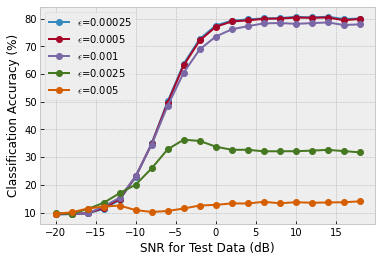

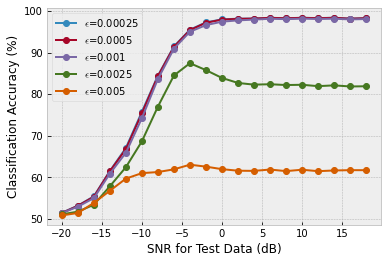

In [ ]:
data = pickle.load(open('outputs/vtcnn2_FGSM_wb_5fold_shift1_op.pkl', 'rb'))
logger = data['result_logger']

plt.figure()
for i, eps in enumerate(logger.epsilons): 
    plt.plot(logger.snrs, 100*logger.accuracy[:, i], marker='o', label=''.join(['$\epsilon$=', str(eps)]))
plt.legend()
plt.ylabel('Classification Accuracy (%)')
plt.xlabel('SNR for Test Data (dB)')
plt.savefig('outputs/fgsm_5fold_shift1_accuracy_epsilons.pdf', bbox = 'tight')

plt.figure()
for i, eps in enumerate(logger.epsilons): 
    plt.plot(logger.snrs, 100*logger.aucs[:, i], marker='o', label=''.join(['$\epsilon$=', str(eps)]))
plt.legend()
plt.ylabel('Classification Accuracy (%)')
plt.xlabel('SNR for Test Data (dB)')
plt.savefig('outputs/fgsm_5fold_shift1_auc_epsilons.pdf', bbox = 'tight')

In [ ]:
! tensorboard --logdir logs/fit

2022-04-28 17:56:01.536449: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.8.0 at http://localhost:6006/ (Press CTRL+C to quit)


In [ ]:
import tensorflow as tf
from tensorflow import keras 

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
# read the saved weights from the recordings
reconstructed_model = keras.models.load_model("FGSM_CNN2_1fold.wts.h5")

In [ ]:
from arml import utils

In [ ]:
X, Y, snrs, mods, _ = utils.load_radioml(file_path='data/RML2016.10a_dict.pkl', shuffle=True)

In [ ]:
import numpy as np

In [ ]:
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

In [ ]:
Y_arg = np.argmax(Y,axis = 1)

In [ ]:
Y_arg.shape

(220000,)

In [ ]:
predictions = reconstructed_model.predict(X)

C:\Users\wenhanzhang\Anaconda3\envs\RML_2\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(Y, axis=1)) / len(Y)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 57.269999999999996%
